In [26]:
from itertools import combinations
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from SALib.analyze import sobol

In [27]:
df_list = []
for file in listdir("outputs"):
    df_list.append(
        pd.read_csv(
            f"outputs/{file}",
            index_col=0,
        )
    )
df = pd.concat(df_list)
df

,RunId,iteration,Step,legitimacy,active_threshold,reversion_rate,prob_quiet,active,quiet,arrested
0,4,0,100,0.217637,0.167519,0.157563,0.488052,0,70,1068
1,5,0,100,0.217637,0.362463,0.580228,0.488052,0,126,995
2,3,0,100,0.199589,0.362463,0.157563,0.488052,0,115,1005
3,2,0,100,0.217637,0.362463,0.157563,0.488052,0,118,1003
4,7,0,100,0.217637,0.167519,0.580228,0.124563,0,261,821
...,...,...,...,...,...,...,...,...,...,...
10235,10235,9,100,0.476886,0.178470,0.981436,0.172458,0,366,739
10236,10238,9,100,0.362574,0.442547,0.719098,0.483070,0,309,830
10237,10225,9,100,0.830438,0.598535,0.154355,0.287093,0,1098,0
10238,10236,9,100,0.362574,0.502296,0.719098,0.483070,0,515,588


In [28]:
param_tuples = [
    ("legitimacy", [0.1, 1.0]),
    ("active_threshold", [0.0, 0.9]),
    ("reversion_rate", [0.0, 1.0]),
    ("prob_quiet", [0.0, 0.5]),
]

param_names, param_bounds = zip(*param_tuples)
param_names = list(param_names)
param_bounds = list(param_bounds)

problem = {
    "num_vars": len(param_names),
    "names": param_names,
    "bounds": param_bounds,
}

arrested = sobol.analyze(problem, df["arrested"].values, print_to_console=True)
quiet = sobol.analyze(problem, df["quiet"].values, print_to_console=True)
active = sobol.analyze(problem, df["active"].values, print_to_console=True)

/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.713435  0.016461
active_threshold  0.782870  0.016822
reversion_rate    0.816468  0.014540
prob_quiet        0.883603  0.017364
                        S1   S1_conf
legitimacy        0.009844  0.019945
active_threshold  0.065518  0.018594
reversion_rate    0.080473  0.019257
prob_quiet        0.132487  0.020886
                                          S2   S2_conf
(legitimacy, active_threshold)      0.153808  0.031016
(legitimacy, reversion_rate)        0.161320  0.029297
(legitimacy, prob_quiet)            0.192058  0.032616
(active_threshold, reversion_rate)  0.059222  0.028782
(active_threshold, prob_quiet)      0.083993  0.029492
(reversion_rate, prob_quiet)        0.011349  0.032123


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.713933  0.015280
active_threshold  0.782242  0.016658
reversion_rate    0.816943  0.017120
prob_quiet        0.883898  0.019161
                        S1   S1_conf
legitimacy        0.010891  0.016613
active_threshold  0.065525  0.017987
reversion_rate    0.081499  0.019334
prob_quiet        0.133020  0.018959
                                          S2   S2_conf
(legitimacy, active_threshold)      0.153078  0.028193
(legitimacy, reversion_rate)        0.159710  0.026198
(legitimacy, prob_quiet)            0.191488  0.027547
(active_threshold, reversion_rate)  0.058812  0.027740
(active_threshold, prob_quiet)      0.083789  0.028599
(reversion_rate, prob_quiet)        0.010767  0.026480


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.971022  0.222604
active_threshold  0.971062  0.195884
reversion_rate    0.926408  0.162178
prob_quiet        1.085733  0.257541
                        S1   S1_conf
legitimacy       -0.005378  0.014070
active_threshold  0.003766  0.015227
reversion_rate    0.024396  0.043039
prob_quiet        0.000589  0.015384
                                          S2   S2_conf
(legitimacy, active_threshold)      0.030751  0.037764
(legitimacy, reversion_rate)        0.043610  0.060033
(legitimacy, prob_quiet)            0.088343  0.063710
(active_threshold, reversion_rate)  0.052583  0.086345
(active_threshold, prob_quiet)      0.039724  0.061307
(reversion_rate, prob_quiet)        0.002070  0.053774


In [29]:
def plot_index(s, params, i, title=""):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == "2":
        p = len(params)
        params = list(combinations(params, 2))
        indices = s["S" + i].reshape(p**2)
        indices = indices[~np.isnan(indices)]
        errors = s["S" + i + "_conf"].reshape(p**2)
        errors = errors[~np.isnan(errors)]
    else:
        indices = s["S" + i]
        errors = s["S" + i + "_conf"]
        plt.figure()

    length = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(length), params)
    plt.errorbar(indices, range(length), xerr=errors, linestyle="None", marker="o")
    plt.axvline(0, c="k")

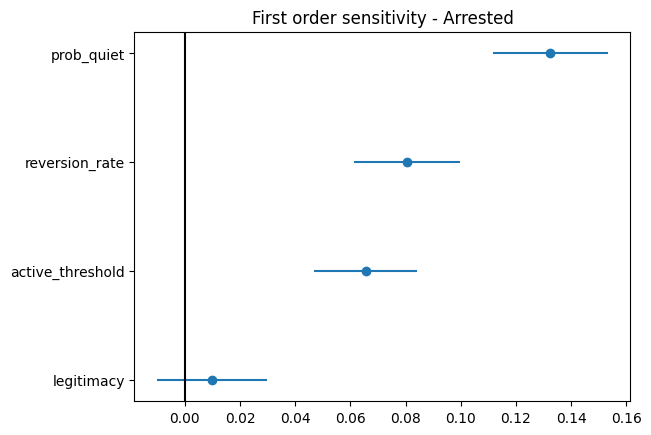

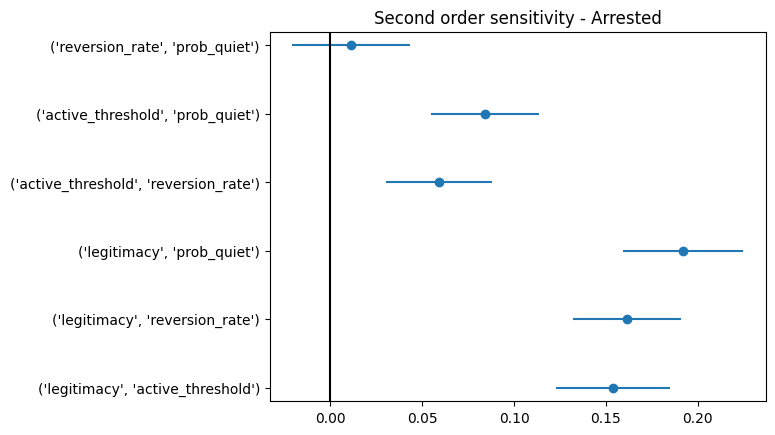

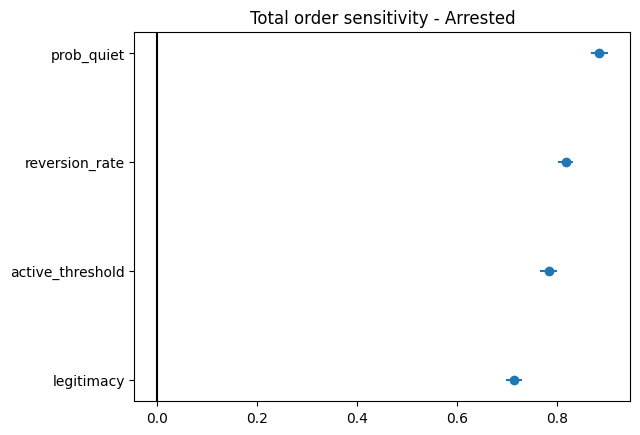

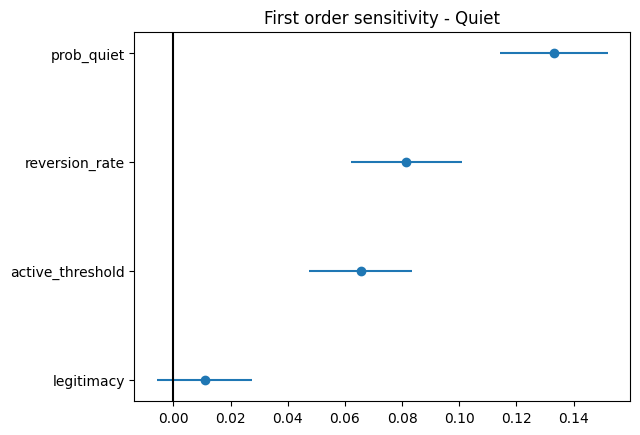

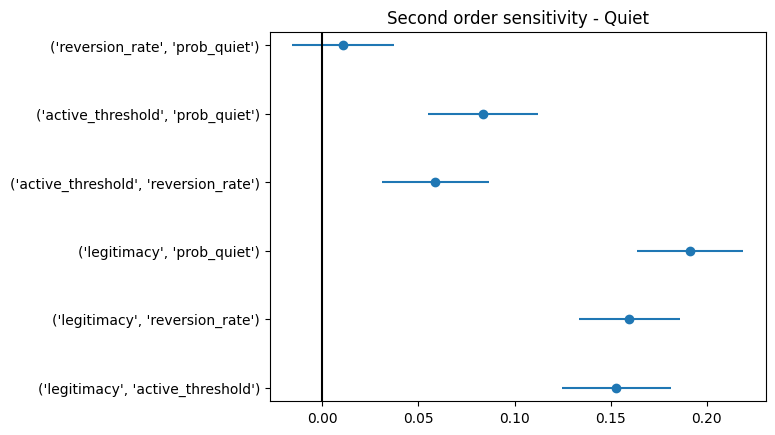

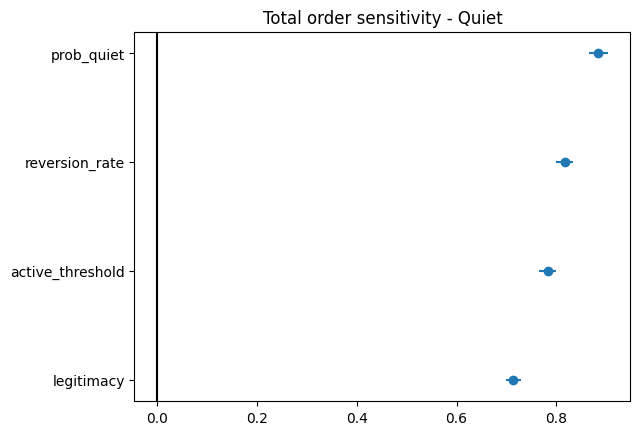

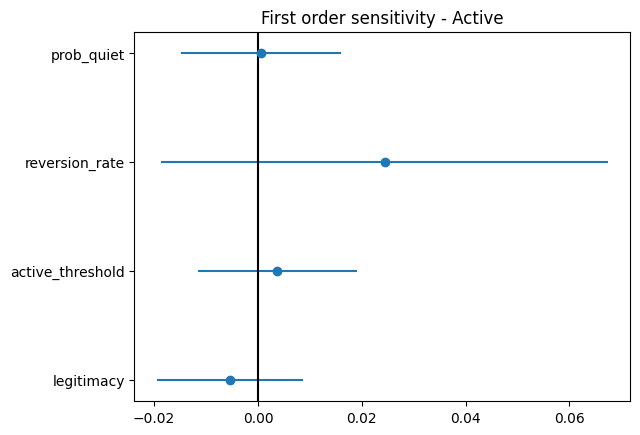

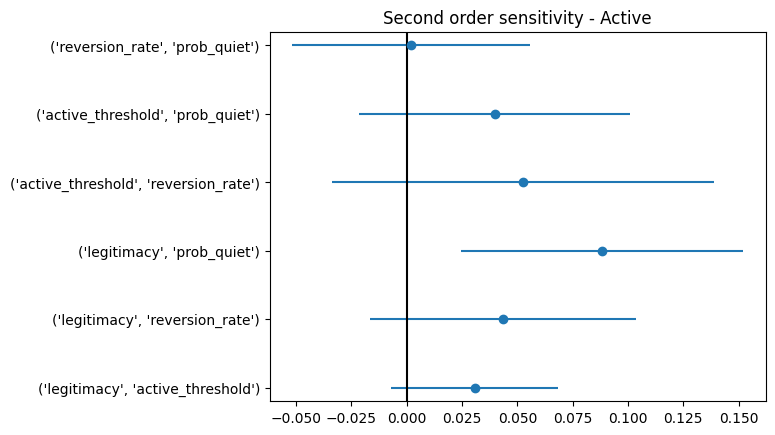

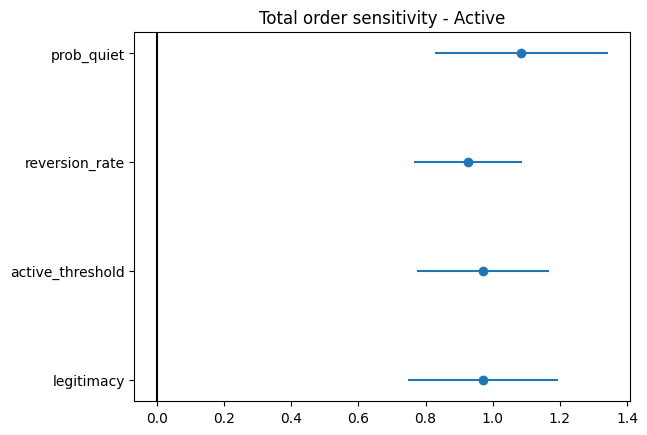

In [30]:
plot_index(arrested, problem["names"], "1", "First order sensitivity - Arrested")
plt.show()
# Second order
plot_index(arrested, problem["names"], "2", "Second order sensitivity - Arrested")
plt.show()
# Total order
plot_index(arrested, problem["names"], "T", "Total order sensitivity - Arrested")
plt.show()

plot_index(quiet, problem["names"], "1", "First order sensitivity - Quiet")
plt.show()
# Second order
plot_index(quiet, problem["names"], "2", "Second order sensitivity - Quiet")
plt.show()
# Total order
plot_index(quiet, problem["names"], "T", "Total order sensitivity - Quiet")
plt.show()

plot_index(active, problem["names"], "1", "First order sensitivity - Active")
plt.show()
# Second order
plot_index(active, problem["names"], "2", "Second order sensitivity - Active")
plt.show()
# Total order
plot_index(active, problem["names"], "T", "Total order sensitivity - Active")
plt.show()